<a href="https://colab.research.google.com/github/c-roets/delayNN/blob/main/DelayNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Smart Instrumentation Delay between peaks - Neural Network (Calvin Roets)

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import math
import os

import pandas as pd
import natsort

from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers
from zipfile import ZipFile
import tensorflow as tf

In [2]:
standaarddirectory = os.getcwd()
file_name = "delay_dataset.zip"
if not os.path.exists("stud_train"):
  with ZipFile(file_name,'r') as zip:
    zip.extractall()
    print("extractie data klaar")

if not os.path.exists("stud_train_combinedASDR"):
  os.makedirs("stud_train_combinedASDR")



extractie data klaar


In [3]:
# constants
train_set = 'stud_train'
test_set = 'stud_test'
i = 0
nummer = 1
evencheck = 0
x = np.arange(0, 1024)
k = 0

In [4]:
#Geeft een array met strings weer waarin de namen van de files in die map staan
def laadarraymetfilenamenuitmap(map):
    j = 0
    filenames = [None] * 600  # array met alle filenames van in folder
    # iterate over files in that directory
    for filename in os.listdir(train_set):
        f = os.path.join(train_set, filename)
        # checking if it is a file
        if os.path.isfile(f):
            filenames[j] = f
            j += 1
    filenames.sort()
    return filenames

In [5]:
#plot het signaal van een numpy array aan de hand van een megegeven signaalbestandsnaam
def plotsignaal(signaal): #signaal is naam bestand tussen aanhalingstekens
    if evencheck % 2 == 0:
        kleur = "red"
    else:
        kleur = "blue"
    plot = plt.figure(nummer)
    plt.xlabel("X axis")
    plt.ylabel("Y axis")
    plt.plot(x,np.load(signaal), color=kleur)

In [6]:
#Geeft de waarde van de positie van die piek terug aan de hand van de bestandsnaam
def geefpositiepiek(signaal):
  truncatedsignaal = (signaal.split("P_",1)[1]) #alles voor de xxx wegdoen dus BV ASDR_P_ wegdoen
  piek = ''.join(x for x in truncatedsignaal[0:3] if x.isdigit()) 
  return piek


In [7]:
#voegt de array van twee signalen samen om 1 vector van 1024 samples te bekomen
def voegsamen(signaal1, signaal2):
  return np.concatenate([np.load(signaal1), np.load(signaal2)])

['1.npy',
 '2.npy',
 '3.npy',
 '4.npy',
 '5.npy',
 '6.npy',
 '7.npy',
 '8.npy',
 '9.npy',
 '10.npy',
 '11.npy',
 '12.npy',
 '13.npy',
 '14.npy',
 '15.npy',
 '16.npy',
 '17.npy',
 '18.npy',
 '19.npy',
 '20.npy',
 '21.npy',
 '22.npy',
 '23.npy',
 '24.npy',
 '25.npy',
 '26.npy',
 '27.npy',
 '28.npy',
 '29.npy',
 '30.npy',
 '31.npy',
 '32.npy',
 '33.npy',
 '34.npy',
 '35.npy',
 '36.npy',
 '37.npy',
 '38.npy',
 '39.npy',
 '40.npy',
 '41.npy',
 '42.npy',
 '43.npy',
 '44.npy',
 '45.npy',
 '46.npy',
 '47.npy',
 '48.npy',
 '49.npy',
 '50.npy',
 '51.npy',
 '52.npy',
 '53.npy',
 '54.npy',
 '55.npy',
 '56.npy',
 '57.npy',
 '58.npy',
 '59.npy',
 '60.npy',
 '61.npy',
 '62.npy',
 '63.npy',
 '64.npy',
 '65.npy',
 '66.npy',
 '67.npy',
 '68.npy',
 '69.npy',
 '70.npy',
 '71.npy',
 '72.npy',
 '73.npy',
 '74.npy',
 '75.npy',
 '76.npy',
 '77.npy',
 '78.npy',
 '79.npy',
 '80.npy',
 '81.npy',
 '82.npy',
 '83.npy',
 '84.npy',
 '85.npy',
 '86.npy',
 '87.npy',
 '88.npy',
 '89.npy',
 '90.npy',
 '91.npy',
 '92.npy

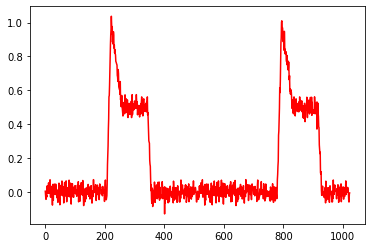

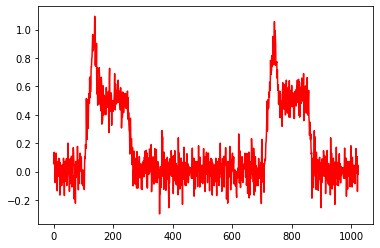

In [8]:
#main
filenames = laadarraymetfilenamenuitmap(train_set)

filenamesASDR = filenames[0:200]
filenamesGAUSS = filenames[200:400]
filenamesSBOX = filenames[400:600]
trainingdata = np.empty   #array met arrays van 1024 samples
delaypiek = []    #array met actuele delays tussen de pieken (validatiecijfers voor training)

for data in filenamesASDR:
  evencheck += 1
  if k != 0 and evencheck % 2 == 0:
    masterfile = voegsamen(previous, data)            #MASTERFILE IS DE ARRAY VAN 1024 SAMPLES VAN DE TWEE SIGNALEN SAMEN
    os.chdir("stud_train_combinedASDR")
    savename = f"{nummer}.npy"
    np.save(savename,masterfile)
    os.chdir(standaarddirectory)
    #trainingdata = np.append((trainingdata, masterfile)) #array in array maar werkt niet, voegt alle arrays na elkaar in plaats van in elkaar
    nummer += 1
    delaypiek.append(512-int(geefpositiepiek(previous))+int(geefpositiepiek(data)))

    #plotten voor eerste paar grafieken, mooie visualisatie als controle
    if evencheck < 5:  #evencheck > aantal grafieken*2, max 41 vanwege memory limiet
      plot= plt.figure(nummer)
      plt.plot(x,masterfile, color="red")

  k += 1
  previous = data

ASDRCOMBINEDFILES = os.listdir("stud_train_combinedASDR")
natsort.natsorted(ASDRCOMBINEDFILES)

In [9]:
print(filenamesASDR)
print(len(filenamesASDR))
print(delaypiek)
print(len(delaypiek))

['stud_train/ADSR0_P_282_SNR20DB.npy', 'stud_train/ADSR0_P_343_SNR20DB.npy', 'stud_train/ADSR10_P_184_SNR10DB.npy', 'stud_train/ADSR10_P_277_SNR10DB.npy', 'stud_train/ADSR11_P_101_SNR11DB.npy', 'stud_train/ADSR11_P_154_SNR11DB.npy', 'stud_train/ADSR12_P_226_SNR10DB.npy', 'stud_train/ADSR12_P_265_SNR10DB.npy', 'stud_train/ADSR13_P_279_SNR16DB.npy', 'stud_train/ADSR13_P_333_SNR16DB.npy', 'stud_train/ADSR14_P_231_SNR33DB.npy', 'stud_train/ADSR14_P_325_SNR33DB.npy', 'stud_train/ADSR15_P_188_SNR27DB.npy', 'stud_train/ADSR15_P_275_SNR27DB.npy', 'stud_train/ADSR16_P_104_SNR11DB.npy', 'stud_train/ADSR16_P_164_SNR11DB.npy', 'stud_train/ADSR17_P_257_SNR18DB.npy', 'stud_train/ADSR17_P_322_SNR18DB.npy', 'stud_train/ADSR18_P_215_SNR10DB.npy', 'stud_train/ADSR18_P_293_SNR10DB.npy', 'stud_train/ADSR19_P_202_SNR27DB.npy', 'stud_train/ADSR19_P_260_SNR27DB.npy', 'stud_train/ADSR1_P_295_SNR12DB.npy', 'stud_train/ADSR1_P_341_SNR12DB.npy', 'stud_train/ADSR20_P_271_SNR16DB.npy', 'stud_train/ADSR20_P_310_SNR

In [12]:
os.chdir(standaarddirectory)
os.chdir("stud_train_combinedASDR")
#dfASDR = pd.DataFrame(data = np.load("1.npy"))
#dfASDR = pd.DataFrame(data = np.load("2.npy"))

#df = pd.DataFrame(np.load(f"{x}.npy") for x in range(1, 101))
samples = [np.load(f"{x}.npy") for x in range(1, 101)]
samples = tf.convert_to_tensor(samples)
#samples = tf.Tensor(samples)
print(samples)
#for combinedfile in ASDRCOMBINEDFILES:

#df = df.T Transponeren van het dataframe
#print(dfASDR)
#print(df)
#df = tf.convert_to_tensor(df)
os.chdir(standaarddirectory)

tf.Tensor(
[[ 0.0058525  -0.01986469 -0.04207491 ... -0.0574152  -0.00829762
  -0.00452807]
 [ 0.05671491  0.13233862  0.13553909 ... -0.14055404  0.04652384
  -0.0200293 ]
 [ 0.02777272  0.00563889 -0.00263572 ...  0.01737589 -0.04655543
   0.10096925]
 ...
 [ 0.01481848  0.00277846  0.01475967 ...  0.00505317  0.01801255
  -0.0097372 ]
 [-0.0066988   0.01923519 -0.05249341 ...  0.05200485 -0.07116493
   0.07353188]
 [-0.00545981 -0.0317611  -0.04938388 ...  0.09577664 -0.04945712
  -0.09993312]], shape=(100, 1024), dtype=float64)


In [14]:
dfdelay = pd.DataFrame(data = delaypiek)
dfdelay = tf.convert_to_tensor(dfdelay)
#print(type(dfdelay))
#print(dfdelay)


<class 'tensorflow.python.framework.ops.EagerTensor'>
tf.Tensor(
[[573]
 [605]
 [565]
 [551]
 [566]
 [606]
 [599]
 [572]
 [577]
 [590]
 [570]
 [558]
 [551]
 [458]
 [584]
 [590]
 [420]
 [549]
 [606]
 [543]
 [557]
 [547]
 [588]
 [554]
 [558]
 [551]
 [599]
 [576]
 [598]
 [464]
 [555]
 [584]
 [585]
 [559]
 [574]
 [553]
 [557]
 [600]
 [419]
 [551]
 [557]
 [582]
 [583]
 [567]
 [562]
 [601]
 [553]
 [545]
 [556]
 [598]
 [610]
 [585]
 [603]
 [587]
 [543]
 [609]
 [556]
 [547]
 [414]
 [543]
 [603]
 [604]
 [562]
 [581]
 [599]
 [584]
 [605]
 [554]
 [569]
 [603]
 [584]
 [548]
 [570]
 [571]
 [581]
 [597]
 [603]
 [567]
 [562]
 [595]
 [612]
 [585]
 [574]
 [574]
 [604]
 [598]
 [546]
 [589]
 [557]
 [576]
 [606]
 [542]
 [597]
 [573]
 [564]
 [564]
 [567]
 [575]
 [564]
 [578]], shape=(100, 1), dtype=int64)


In [26]:
# Create a model
model = tf.keras.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(1024,)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1))

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 512)               524800    
                                                                 
 dense_11 (Dense)            (None, 256)               131328    
                                                                 
 dense_12 (Dense)            (None, 64)                16448     
                                                                 
 dense_13 (Dense)            (None, 8)                 520       
                                                                 
 dense_14 (Dense)            (None, 1)                 9         
                                                                 
Total params: 673,105
Trainable params: 673,105
Non-trainable params: 0
_________________________________________________________________


In [28]:
# Add optimizer, loss function, and metrics to model and compile it
model.compile(optimizer='adam', loss='mae', metrics=['mae'])

In [29]:
# Train model
history = model.fit(samples,
                    dfdelay,
                    epochs=500)

Epoch 1/500
4/4 [==============================] - 1s 9ms/step - loss: 567.5607 - mae: 567.5607
Epoch 2/500
4/4 [==============================] - 0s 8ms/step - loss: 561.4108 - mae: 561.4108
Epoch 3/500
4/4 [==============================] - 0s 8ms/step - loss: 545.1710 - mae: 545.1710
Epoch 4/500
4/4 [==============================] - 0s 9ms/step - loss: 508.0526 - mae: 508.0526
Epoch 5/500
4/4 [==============================] - 0s 9ms/step - loss: 434.3868 - mae: 434.3868
Epoch 6/500
4/4 [==============================] - 0s 10ms/step - loss: 301.1133 - mae: 301.1133
Epoch 7/500
4/4 [==============================] - 0s 8ms/step - loss: 101.3765 - mae: 101.3765
Epoch 8/500
4/4 [==============================] - 0s 8ms/step - loss: 140.1215 - mae: 140.1215
Epoch 9/500
4/4 [==============================] - 0s 8ms/step - loss: 85.0765 - mae: 85.0765
Epoch 10/500
4/4 [==============================] - 0s 10ms/step - loss: 92.0749 - mae: 92.0749
Epoch 11/500
4/4 [=======================

In [31]:
predictions = model.predict(samples)
print(predictions)
print(delaypiek)

4/4 [==============================] - 0s 6ms/step
[[569.32153]
 [590.5549 ]
 [561.4869 ]
 [528.8269 ]
 [561.452  ]
 [588.7746 ]
 [583.0202 ]
 [573.58704]
 [566.9161 ]
 [573.60925]
 [551.1864 ]
 [546.31946]
 [541.60657]
 [470.26538]
 [582.57184]
 [588.5635 ]
 [421.52795]
 [546.9486 ]
 [589.47595]
 [535.92957]
 [551.9558 ]
 [534.0269 ]
 [580.16223]
 [547.54956]
 [534.9362 ]
 [542.2678 ]
 [596.1312 ]
 [561.09686]
 [594.33136]
 [475.64066]
 [550.0333 ]
 [570.78784]
 [567.50946]
 [559.9796 ]
 [551.38776]
 [546.67847]
 [554.4557 ]
 [598.515  ]
 [420.8369 ]
 [546.8988 ]
 [562.46027]
 [581.3909 ]
 [580.05945]
 [558.12585]
 [557.47833]
 [596.8028 ]
 [555.8073 ]
 [539.9532 ]
 [541.5255 ]
 [577.64923]
 [596.3173 ]
 [565.8779 ]
 [576.5343 ]
 [581.3449 ]
 [541.03687]
 [602.05994]
 [533.1641 ]
 [565.1769 ]
 [415.4047 ]
 [530.436  ]
 [577.616  ]
 [587.9477 ]
 [547.59375]
 [579.215  ]
 [594.38513]
 [579.7257 ]
 [594.4563 ]
 [555.51337]
 [564.51385]
 [599.2723 ]
 [571.4917 ]
 [531.3787 ]
 [568.0175 ]


In [ ]:
#reset